# K-Means Clustering on Iris (Section 2 Task 2)

This notebook runs KMeans for different k, computes ARI vs the true labels, plots an elbow curve, and visualizes clusters.

## Load preprocessed Iris data

Load the saved `iris_preprocessed.csv` and extract feature array `X` and true labels.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from pathlib import Path
import matplotlib.pyplot as plt

PROJECT_ROOT = Path.cwd().parent
IMAGES_DIR = PROJECT_ROOT / 'outputs' / 'images'
IMAGES_DIR.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(PROJECT_ROOT / 'data' / 'iris_preprocessed.csv')
X = df[df.columns[:4]].values
true_labels = df['species_encoded'].values

## Run K-Means for k = 2, 3, 4 and compute ARI

This cell fits KMeans for each k and computes the Adjusted Rand Index comparing clusters to species labels.

In [2]:
# Run KMeans for k=2,3,4
results = {}
for k in [2,3,4]:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    preds = km.fit_predict(X)
    ari = adjusted_rand_score(true_labels, preds)
    results[k] = {'ari': ari, 'inertia': km.inertia_}
results

{2: {'ari': 0.5681159420289855, 'inertia': 12.127790750538196},
 3: {'ari': 0.7163421126838476, 'inertia': 6.982216473785236},
 4: {'ari': 0.6230929299814632, 'inertia': 5.516933472040371}}

## Elbow curve and cluster scatter plot

Compute inertia for k=1..8 (elbow curve) and create a petal-length vs petal-width scatter colored by cluster labels for k=3.

Saved iris_elbow_curve.png and iris_k3_clusters.png in c:\Users\HP\Documents\DSA2040_Practical_Exam_Geoffrey_Mwangi_566\outputs\images


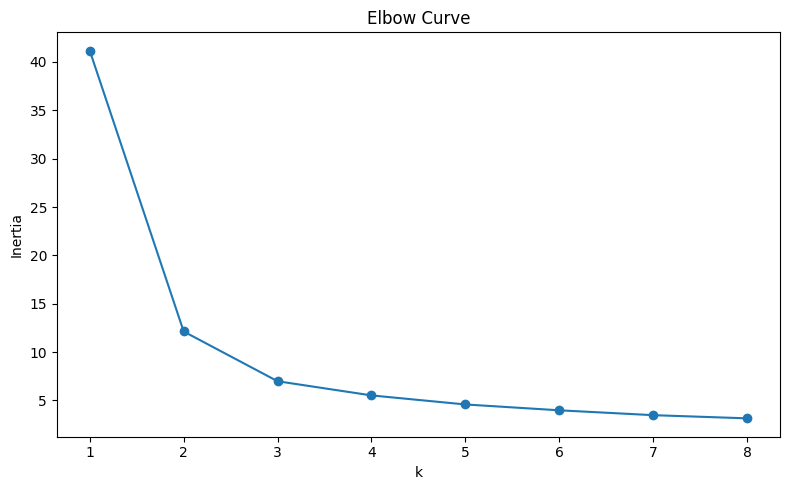

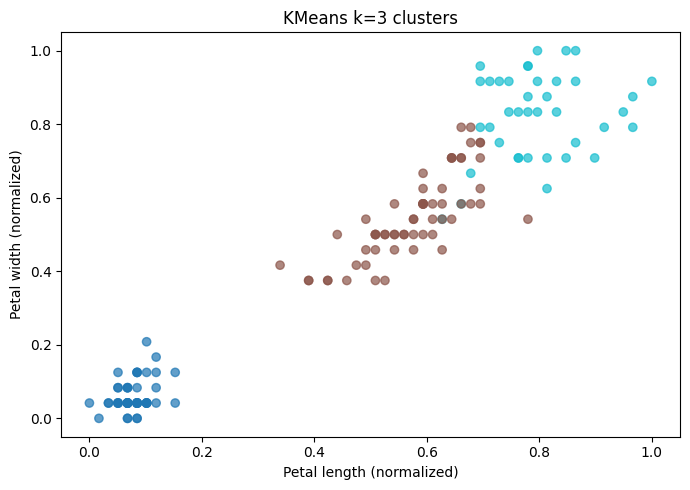

In [3]:
# Elbow curve (k=1..8) and k=3 scatter
inertias=[]
ks=range(1,9)
for k in ks:
    km=KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)
plt.figure(figsize=(8,5))
plt.plot(list(ks), inertias, marker='o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Curve')
plt.tight_layout()
plt.savefig(IMAGES_DIR / 'iris_elbow_curve.png')


km3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)
preds3 = km3.predict(X)
plt.figure(figsize=(7,5))
plt.scatter(X[:,2], X[:,3], c=preds3, cmap='tab10', alpha=0.7)
plt.xlabel('Petal length (normalized)')
plt.ylabel('Petal width (normalized)')
plt.title('KMeans k=3 clusters')
plt.tight_layout()
plt.savefig(IMAGES_DIR / 'iris_k3_clusters.png')

print('Saved iris_elbow_curve.png and iris_k3_clusters.png in', IMAGES_DIR)